# **Analisis Data Penerbangan**

Tugas Analisis Data <br> 
***Arif Rachman Hakim*** <br>

<br>
1. Dari hasil analisis berdasarkan grafik dibawahh ini didapatkan kesimpulan bahwa penyebab delay utama ialah diakarenakan Cuaca dan NAS.  <br>
2. dan Juga didapatkan 3 kelompok kluster untuk mewakili data flight delay ini.<br>
3. kode dijelaskan dibawah ini.

***Import module yang dibutuhkan ***

In [1]:
import pandas as pd
import numpy as np

***Membaca Data FlightDelay yang sudah di upload di server***

In [2]:
dataPath = pd.read_csv(r'http://182.16.248.172/geophysics/ProjectHAKIM/Tugas_AnalisisData_ArifRachmanHakim/DelayedFlights.csv')

Bentuk dataPath *file.csv* ke dalam data frame dengan menggunakan module pandas, dengan perintah pd.DataFrame(data)

In [3]:
df = pd.DataFrame(dataPath)
display (df.head(6)) # menampilkan data dengan 6 baris pertama

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0


Melakukan pembersihan data, dikarenakan ada data yang memiliki atribute Not A Number atau (NAN) <br>

*   merubah sebagian format dalam bentuk waktu
*   mengganti Nan dengan 0

In [4]:
df[['DayofMonth', 'Month', 'Year']] = df[['DayofMonth', 'Month', 'Year']].astype(str) # merubah dalam bentuk format waktu
df['Date'] = df['DayofMonth'] + ':' + df['Month'] + ':' + df['Year']
df['Date'] = pd.to_datetime(df['Date'], format="%d:%m:%Y")

df['DepTime'] = df.DepTime[~df.DepTime.isna()].astype(np.int64).apply('{:0>4}'.format)
df['DepTime'] = pd.to_timedelta(df.DepTime.str[:2]+':'+df.DepTime.str[2:]+':00')

df['CRSDepTime'] = df.CRSDepTime[~df.CRSDepTime.isna()].astype(np.int64).apply('{:0>4}'.format)
df['CRSDepTime'] = pd.to_timedelta(df.CRSDepTime.str[:2]+':'+df.CRSDepTime.str[2:]+':00')

df['ArrTime'] = df.ArrTime[~df.ArrTime.isna()].astype(np.int64).apply('{:0>4}'.format)
df['ArrTime'] = pd.to_timedelta(df.ArrTime.str[:2]+':'+df.ArrTime.str[2:]+':00')

df['CRSArrTime'] = df.CRSArrTime[~df.CRSArrTime.isna()].astype(np.int64).apply('{:0>4}'.format)
df['CRSArrTime'] = pd.to_timedelta(df.CRSArrTime.str[:2]+':'+df.CRSArrTime.str[2:]+':00')

df[['DepTime','CRSDepTime', 'ArrTime', 'CRSArrTime']] = df[['DepTime','CRSDepTime', 'ArrTime', 'CRSArrTime']]\
                                                          .apply(lambda x: pd.to_timedelta(x))

df['CarrierDelay'] = df['CarrierDelay'].fillna(0).astype('int') #mengganti NAN menjadi 0
df['WeatherDelay'] = df['WeatherDelay'].fillna(0).astype('int')
df['NASDelay'] = df['NASDelay'].fillna(0).astype('int')
df['SecurityDelay'] = df['SecurityDelay'].fillna(0).astype('int')
df['LateAircraftDelay'] = df['LateAircraftDelay'].fillna(0).astype('int')

Langkah pertama dilakukan analisis terhadap data penerbangan yang sukses, menggunakan inisial variabel **penerbangan_sukses**

In [5]:
penerbangan_sukses = df[df['Cancelled'] == 0]

Plot untuk semua penerbangan sukses

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<Figure size 864x864 with 0 Axes>

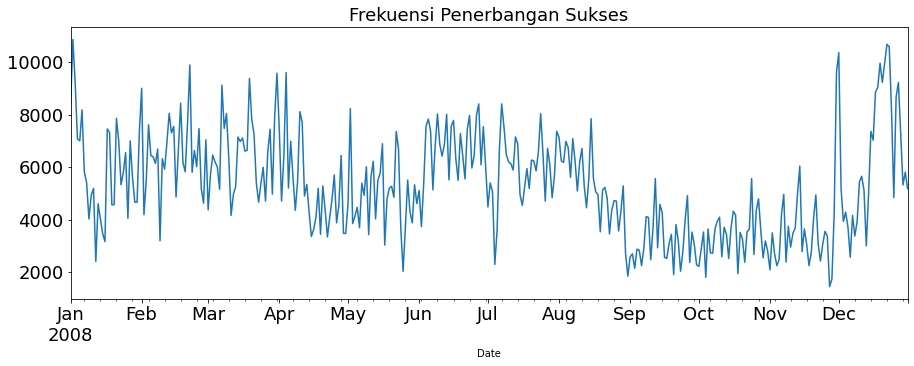

In [9]:
penerbangan_sukses['Date'] = penerbangan_sukses['Date'].astype('datetime64[ns]')
penerbangan_sukses_berdasarkan_hari = penerbangan_sukses.groupby(['Date'])['Date'].count()

import matplotlib.pyplot as plt # tambahkan module matplotlib untuk plot data

fig = plt.figure(figsize=[12, 12])

fig_line = plt.figure(figsize=[15, 5])
ax3 = fig_line.add_subplot(111)
ax3.set_facecolor('white')
ax3.set_title("Frekuensi Penerbangan Sukses", fontsize=18);
penerbangan_sukses_berdasarkan_hari.plot(ax=ax3,legend=False,fontsize=18)

# plot
plt.show()

Melakukan analisis Rata-rata penerbangan delay berdasar data pernerbangan sukses

In [10]:
Rata_delayed_berdasar_carrier = penerbangan_sukses.groupby('Date')[['CarrierDelay']].mean()
Rata_delayed_berdasar_weather = penerbangan_sukses.groupby('Date')[['WeatherDelay']].mean()
Rata_delayed_berdasar_nas = penerbangan_sukses.groupby('Date')[['NASDelay']].mean()
Rata_delayed_berdasar_security = penerbangan_sukses.groupby('Date')[['SecurityDelay']].mean()

Rata_delayed_penerbangan = pd.merge(Rata_delayed_berdasar_weather, Rata_delayed_berdasar_carrier, on='Date')\
                         .merge(Rata_delayed_berdasar_nas, on='Date')\
                         .merge(Rata_delayed_berdasar_security, on='Date')

                         

Plot data rata-rata delayed berdasarkan 4 kategori penyebab delay : **Weather, NAS, Security dan Carrier**

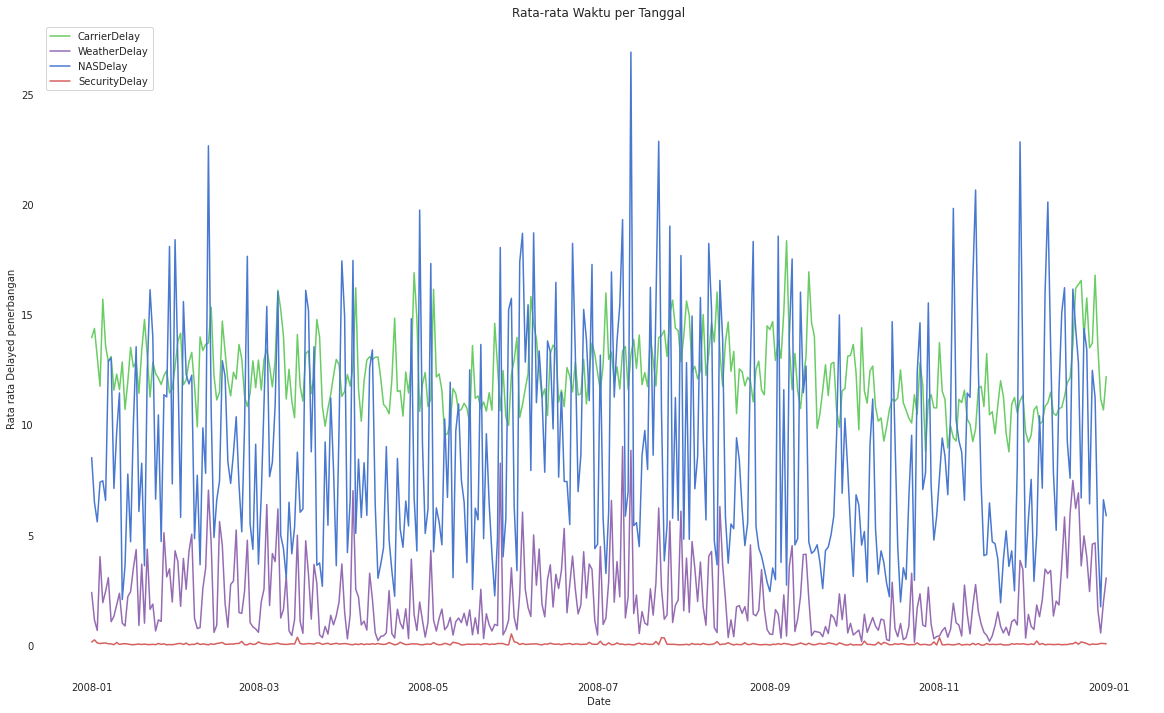

In [17]:
import seaborn as sns # masukan terlebh dahulu module seaborn untuk plotting

sns.set_style("white")
f, ax = plt.subplots(figsize=(20, 12))

# Plot karena CarrierDelay
sns.set_color_codes("muted")
sns.lineplot(x=Rata_delayed_penerbangan.index.tolist(),
            y=Rata_delayed_penerbangan['CarrierDelay'],
            data=Rata_delayed_penerbangan,
            label="CarrierDelay",
            color="g")

# Plot karena WeatherDelay
sns.set_color_codes("muted")
sns.lineplot(x=Rata_delayed_penerbangan.index.tolist(),
            y=Rata_delayed_penerbangan['WeatherDelay'],
            data=Rata_delayed_penerbangan,
            label="WeatherDelay",
            color="m")

# Plot karena NASDelay
sns.set_color_codes("muted")
sns.lineplot(x=Rata_delayed_penerbangan.index.tolist(),
            y=Rata_delayed_penerbangan['NASDelay'],
            data=Rata_delayed_penerbangan,
            label="NASDelay",
            color="b")

# Plot karena SecurityDelay
sns.set_color_codes("muted")
sns.lineplot(x=Rata_delayed_penerbangan.index.tolist(),
            y=Rata_delayed_penerbangan['SecurityDelay'],
            data=Rata_delayed_penerbangan,
            label="SecurityDelay",
            color="r")

# tambahkan legenda dan label x, y
ax.legend(ncol=1, loc="upper left", frameon=True)
ax.set(xlabel='Date', ylabel='Rata rata Delayed penerbangan', title='Rata-rata Waktu per Tanggal')
sns.despine(left=True, bottom=True)

# Di lihat dari grafik di atas, dapat di ambil kesimpulan, **penyebab delayed suatu penerbangan lebih banyak disebabkan oleh cuaca**, terlihat pada grafik berwarna hijau, dan juga National Airspace System (NAS) delay berwarna biru merupakan penyebab delay kedua.

Pada data ini dapat dilakukan juga proses klustering menggunakan K-Means clustering dengan metode elbow atau tekukan untuk menentukan jumlah kluster yang optimal

Text(0, 0.5, 'Distance in Miles')

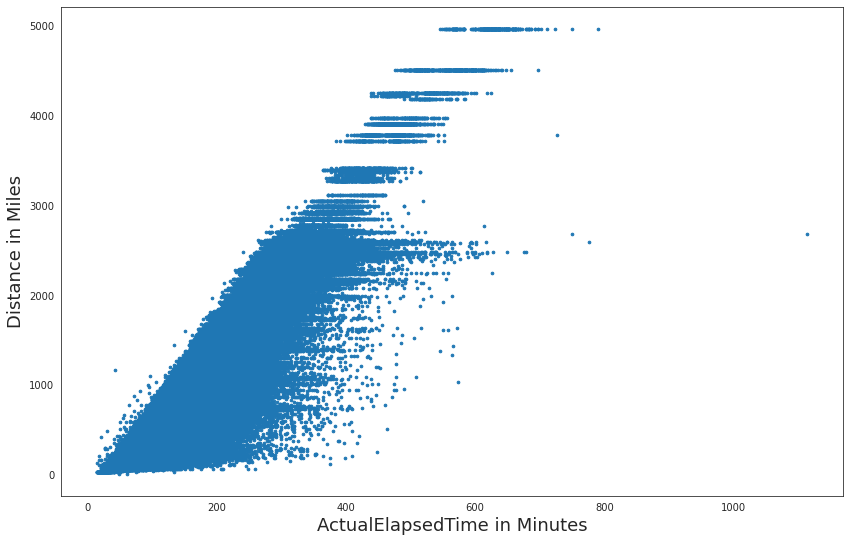

In [19]:
from sklearn.cluster import KMeans

y = penerbangan_sukses[penerbangan_sukses['Date'].isin(pd.date_range('2008-01-28', '2009-01-01'))]

x = y[['ActualElapsedTime', 'Distance']].fillna(0).values

fig= plt.figure(figsize=(14,9))
plt.scatter(y['ActualElapsedTime'], y['Distance'], s=7)
plt.xlabel('ActualElapsedTime in Minutes', fontsize=18)
plt.ylabel('Jarak', fontsize=18)

Melakukan kluster dengan K-Means dan metode elbow atau tekukan untuk menentukan jumalah kluster optimal

In [22]:
kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(x)
display(y_kmeans)
display(kmeans.cluster_centers_)

array([4, 4, 4, ..., 4, 4, 2], dtype=int32)

array([[  74.09630057,  285.94568096],
       [ 233.75869794, 1619.93153371],
       [ 163.4115049 , 1016.34242521],
       [ 328.33200078, 2431.78839876],
       [ 118.424813  ,  627.63732219]])

Metode Elbow

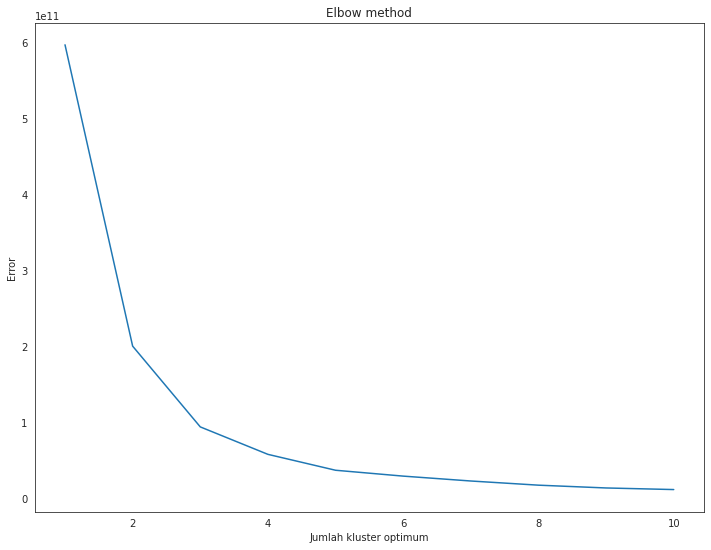

In [23]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(12,9))
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('Jumlah kluster optimum')
plt.ylabel('Error')
plt.show()

Didapatkan cluster optimum ialah pada nilai 3 dengan tekukan yang jelas

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

array([[ 163.22139603, 1007.11457726],
       [  87.3732532 ,  389.86113933],
       [ 283.87046248, 2051.31728168]])

Text(0, 0.5, 'Jarak')

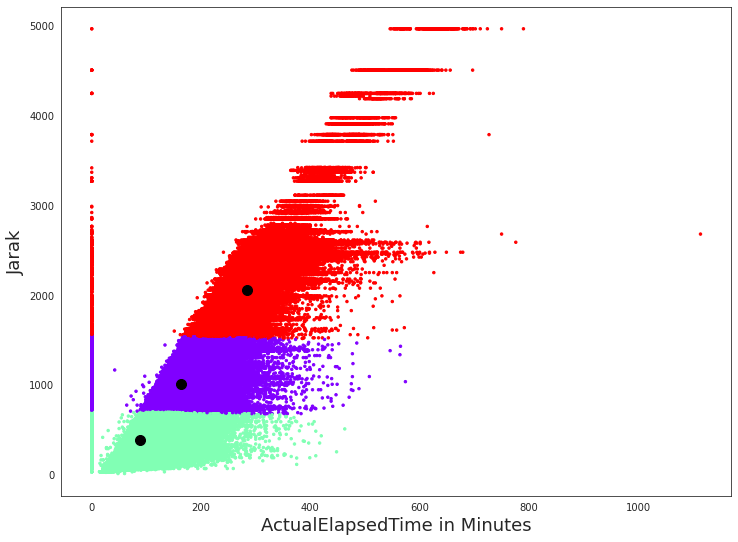

In [24]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)

display(y_kmeans3)
display(kmeans3.cluster_centers_)

fig= plt.figure(figsize=(12,9))
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=6, cmap='rainbow')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=100, c='black')
plt.xlabel('ActualElapsedTime in Minutes', fontsize=18)
plt.ylabel('Jarak', fontsize=18)